In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests


df = pd.read_csv('/content/Lable_data.csv')

In [ ]:
df

,Unnamed: 0,username,author_followers,author_tweets,text,retweets,likes,norm_text,auto_lable
0,0,raumunz,3070,1054648,الحج المبرور ليس له جزاء إلا الجنة#السيرة_كأن...,222.0,0.0,الحج المبرور ليس له جزاء الا الجنه السيره كان...,positive
1,1,hesheey,713,19244,رئيس ساحل العاج يرفض البروتوكول السعودي في الحج,161.0,0.0,رئيس ساحل العاج يرفض البروتوكول السعودى فى الحج,neutral
2,2,ealam_itti,22300,22243,ما تقوم به بلادنا في خدمة حجاج بيت الله الحرا...,692.0,0.0,ما تقوم به بلادنا فى خدمه حجاج بيت الله الحرا...,positive
3,3,3krstzzm,54,7054,شكرا_قيادتنا_على_نجاح_الحج الحمدلله حتى يبلغ ا...,2681.0,0.0,شكرا قيادتنا على نجاح الحج الحمدلله حتى يبلغ ا...,positive
4,4,othman111mo,3563,146035,الاتحاد الأوروبي: السعودية نجحت بإدارة موسم #...,63.0,0.0,الاتحاد الاوروبى السعوديه نجحت باداره موسم ال...,neutral
...,...,...,...,...,...,...,...,...,...
47647,140631,cxi_52,7,128,@MtjrRyf @n_2ad ادخل على وازرة الحج واحجز عالذ...,0.0,0.0,ادخل على وازره الحج واحجز عالذاكرين,neutral
47648,140632,coachshreif3ouf,42009,114342,اليوم 8 ذي الحجة هو يوم التروية حيث تبدأ اول م...,21.0,231.0,اليوم ذى الحجه هو يوم الترويه حيث تبدا اول منا...,positive
47649,140638,LAljmazy,15,177,@kamalsinai كتب الله لنا ولكم الحج والعمرة مرة...,0.0,1.0,كتب الله لنا ولكم الحج والعمره مره بعد مره,positive
47650,140640,vilnca,158,2885,يازييييين مشاعر الحج 🥹🤍,0.0,1.0,يازيين مشاعر الحج,positive


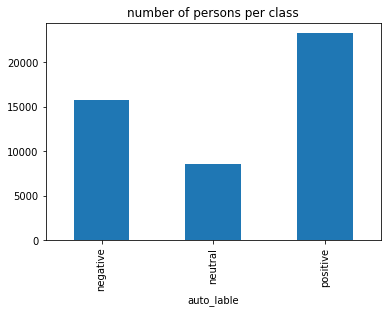

In [ ]:
df.groupby('auto_lable').size().plot(kind='bar', title='number of persons per class')

In [ ]:
len(df[df['auto_lable']=='negative']),len(df[df['auto_lable']=='neutral']),len(df[df['auto_lable']=='positive'])

(15809, 8530, 23313)

In [ ]:
df[df['likes'].isna()]

,Unnamed: 0,username,author_followers,author_tweets,text,retweets,likes,norm_text,auto_lable
2924,9033,NaN,1546838257987735552,أظهر مقطع فيديو لحظة انفعال أحد الحجاج أثناء ر...,1,NaN,NaN,NaN,neutral
45009,130599,alshamari123456,3370,13842,يوم عَرفةمــن الأيام العشرة الفاضله ،أفضِل,NaN,NaN,يوم رفهمــن الايام العشره الفاضله افض,positive


In [ ]:
df[df['likes']==100]

,Unnamed: 0,username,author_followers,author_tweets,text,retweets,likes,norm_text,auto_lable
17378,46367,moh_rawdhan_ye1,80841,63714,اليهود يمنعون المسلمين من الحج ..,7.0,100.0,اليهود يمنعون المسلمين من الحج,negative
28543,76648,vip_se,1580,268,@llidexx @Eyaaaad عند الدين لاتدخل الجنسية وال...,4.0,100.0,عند الدين لاتدخل الجنسيه واللغه تراه مسلم ىعن...,negative
32165,87698,M_Emin_Uyguri,3367,2893,الوقوف في يوم عرفة وأيام مناسك الحج والعمرة - ...,33.0,100.0,الوقوف فى يوم عرفه وايام مناسك الحج والعمره مك...,negative


In [ ]:
df['likes'].value_counts()

0.0      28384
1.0       8698
2.0       3234
3.0       1679
4.0       1085
         ...  
230.0        1
341.0        1
92.0         1
168.0        1
231.0        1
Name: likes, Length: 284, dtype: int64

In [ ]:
df_1000 = df[:1000]

In [ ]:
def get_gender(user_name):
  response = requests.get("https://gender-api.com/get?name="+ user_name +"&key=rUGC3e5SkfuY5PgNya7sbHD3qNsrY4D8qypK")
  return response.json()['gender']

In [ ]:
names = ['AMAL','RICK', 'LUJAIN', 'othman', 'abwmhmd','ealam']
for name in names:
  print(f'{name} is a {get_gender(name)}')

AMAL is a female
RICK is a male
LUJAIN is a female
othman is a male
abwmhmd is a unknown
ealam is a unknown


In [ ]:
df_1000['gender'] = df_1000['username'].apply(str).apply(str.capitalize).map(lambda x: get_gender(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_1000['gender'].value_counts()

unknown    814
male       140
female      46
Name: gender, dtype: int64

### Visualization

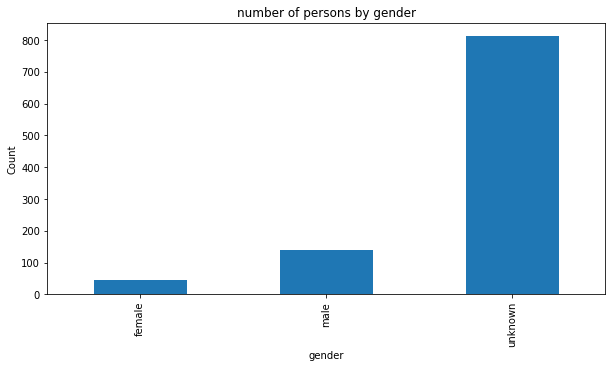

In [ ]:
# 
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))
df_1000.groupby('gender').size().plot(kind='bar', ax=ax1, ylabel='Count', title='number of persons by gender')
plt.show()

In [ ]:
df_1000[df_1000['gender']=='unknown']['username']

0              raumunz
1              hesheey
2           ealam_itti
3             3krstzzm
4          othman111mo
            ...       
994    AboKhaledAboK12
995         uaesafeera
996         saqashqary
997         Nonyamh500
999           Golathos
Name: username, Length: 814, dtype: object

In [ ]:
len(df_1000[df_1000['gender']=='male']),len(df_1000[df_1000['gender']=='female'])

(140, 46)

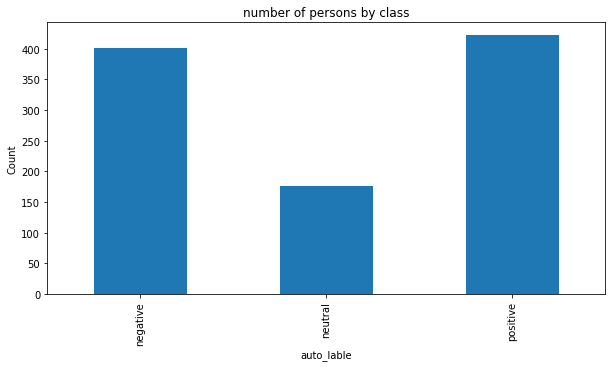

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))

df_1000.groupby('auto_lable').size().plot(kind='bar', ax=ax1, ylabel='Count', title='number of persons by class')

plt.show()

In [ ]:
len(df_1000[df_1000['auto_lable']=='negative'])

402

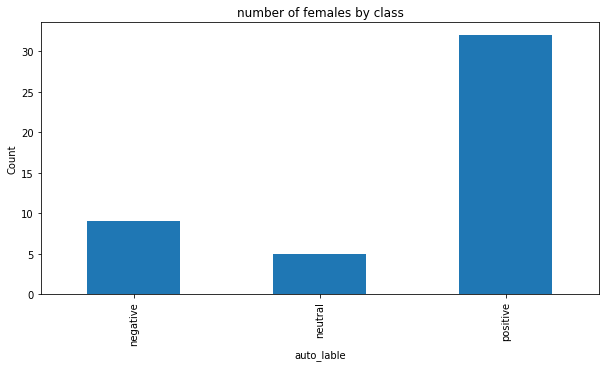

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))

df_1000[df_1000['gender']=='female'].groupby('auto_lable').size().plot(kind='bar', ax=ax1, ylabel='Count', title='number of females by class')

plt.show()

In [ ]:
len(df_1000[df_1000['gender']=='female'][df_1000['auto_lable']=='negative'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


9

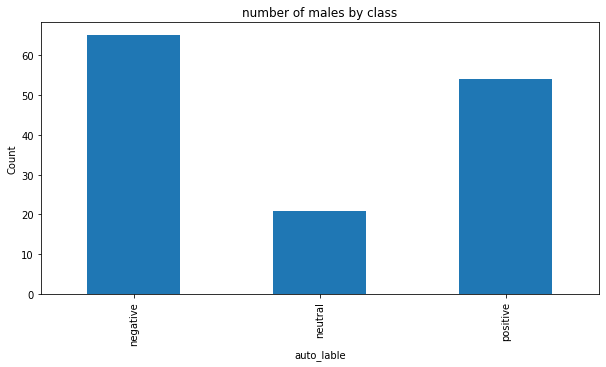

In [ ]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))

df_1000[df_1000['gender']=='male'].groupby('auto_lable').size().plot(kind='bar',ax=ax1, ylabel='Count', title='number of males by class')

plt.show()

In [ ]:
len(df_1000[df_1000['gender']=='male'][df_1000['auto_lable']=='negative'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


65

In [ ]:
len(df_1000[df_1000['gender']=='unknown'][df_1000['auto_lable']=='negative'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


328

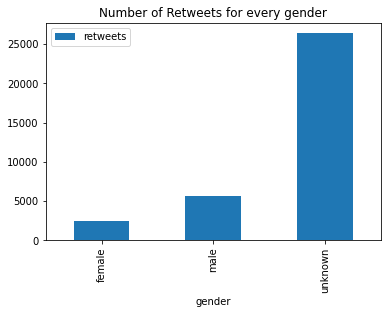

In [ ]:
df_1000[['retweets','gender']].groupby('gender').sum().plot(kind='bar',y='retweets',title="Number of Retweets for every gender")

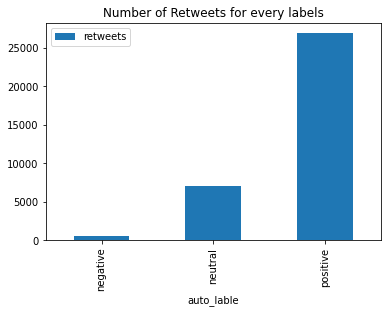

In [ ]:
df_1000[['retweets','auto_lable']].groupby('auto_lable').sum().plot(kind='bar',y='retweets',title="Number of Retweets for every labels")

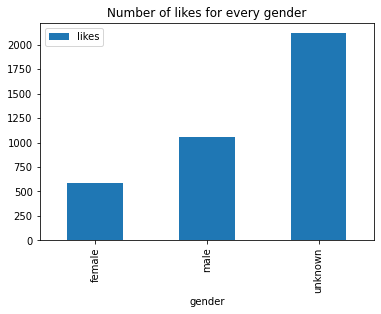

In [ ]:
df_1000[['likes','gender']].groupby('gender').sum().plot(kind='bar',y='likes',title="Number of likes for every gender")

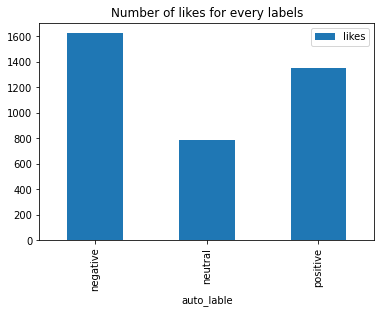

In [ ]:
df_1000[['likes','auto_lable']].groupby('auto_lable').sum().plot(kind='bar',y='likes',title="Number of likes for every labels")

In [ ]:
all_data = pd.read_csv('/content/final_data.csv')

In [ ]:
all_data

,Unnamed: 0,username,author_followers,author_tweets,text,retweets,likes,norm_text,auto_lable,camel_labe
0,0,raumunz,3070,1054648,الحج المبرور ليس له جزاء إلا الجنة#السيرة_كأنك...,222.0,0.0,الحج المبرور ليس له جزاء الا الجنه السيره كانك...,positive,['neutral']
1,1,hesheey,713,19244,رئيس ساحل العاج يرفض البروتوكول السعودي في الحج,161.0,0.0,رئيس ساحل العاج يرفض البروتوكول السعودى فى الحج,neutral,['neutral']
2,2,ealam_itti,22300,22243,ما تقوم به بلادنا في خدمة حجاج بيت الله الحرام...,692.0,0.0,ما تقوم به بلادنا فى خدمه حجاج بيت الله الحرام...,positive,['positive']
3,3,3krstzzm,54,7054,شكرا_قيادتنا_على_نجاح_الحج الحمدلله حتى يبلغ ا...,2681.0,0.0,شكرا قيادتنا على نجاح الحج الحمدلله حتى يبلغ ا...,positive,['positive']
4,4,othman111mo,3563,146035,الاتحاد الأوروبي: السعودية نجحت بإدارة موسم #ا...,63.0,0.0,الاتحاد الاوروبى السعوديه نجحت باداره موسم الح...,neutral,['positive']
...,...,...,...,...,...,...,...,...,...,...
47647,140631,cxi_52,7,128,@MtjrRyf @n_2ad ادخل على وازرة الحج واحجز عالذ...,0.0,0.0,ادخل على وازره الحج واحجز عالذاكرين,neutral,['neutral']
47648,140632,coachshreif3ouf,42009,114342,اليوم 8 ذي الحجة هو يوم التروية حيث تبدأ اول م...,21.0,231.0,اليوم ذى الحجه هو يوم الترويه حيث تبدا اول منا...,positive,['positive']
47649,140638,LAljmazy,15,177,@kamalsinai كتب الله لنا ولكم الحج والعمرة مرة...,0.0,1.0,كتب الله لنا ولكم الحج والعمره مره بعد مره,positive,['positive']
47650,140640,vilnca,158,2885,يازييييين مشاعر الحج 🥹🤍,0.0,1.0,يازيين مشاعر الحج,positive,['positive']


In [ ]:
all_data['camel_labe'][0]

"['neutral']"

In [ ]:
def clean_(text):
  t=text[2:]
  r=t[:len(t)-2]
  return r

In [ ]:
clean_(all_data['camel_labe'][0])

'neutral'

In [ ]:
all_data['cleaned_camel'] = all_data['camel_labe'].apply(clean_)

In [ ]:
all_data.loc[all_data['cleaned_camel']=='positive',:]

,Unnamed: 0,username,author_followers,author_tweets,text,retweets,likes,norm_text,auto_lable,camel_labe,cleaned_camel
2,2,ealam_itti,22300,22243,ما تقوم به بلادنا في خدمة حجاج بيت الله الحرام...,692.0,0.0,ما تقوم به بلادنا فى خدمه حجاج بيت الله الحرام...,positive,['positive'],positive
3,3,3krstzzm,54,7054,شكرا_قيادتنا_على_نجاح_الحج الحمدلله حتى يبلغ ا...,2681.0,0.0,شكرا قيادتنا على نجاح الحج الحمدلله حتى يبلغ ا...,positive,['positive'],positive
4,4,othman111mo,3563,146035,الاتحاد الأوروبي: السعودية نجحت بإدارة موسم #ا...,63.0,0.0,الاتحاد الاوروبى السعوديه نجحت باداره موسم الح...,neutral,['positive'],positive
6,6,rafa_XX8,522,2135,أحب أسمع قصص الحج من كبار السن أو من الأجيال ا...,1.0,2.0,احب اسمع قصص الحج من كبار السن او من الاجيال ا...,positive,['positive'],positive
7,7,SaadFalbuainain,2771,9986,نجاح منقطع النظير، يبعث على الفخر والاعتزاز، ب...,5.0,0.0,نجاح منقطع النظير يبعث على الفخر والاعتزاز بكل...,positive,['positive'],positive
...,...,...,...,...,...,...,...,...,...,...,...
47646,140628,yhya_alameer,11231,25807,@Ali202223865001 مبروك الحج تقبل الله طاعتكم,0.0,1.0,مبروك الحج تقبل الله طاعتكم,positive,['positive'],positive
47648,140632,coachshreif3ouf,42009,114342,اليوم 8 ذي الحجة هو يوم التروية حيث تبدأ اول م...,21.0,231.0,اليوم ذى الحجه هو يوم الترويه حيث تبدا اول منا...,positive,['positive'],positive
47649,140638,LAljmazy,15,177,@kamalsinai كتب الله لنا ولكم الحج والعمرة مرة...,0.0,1.0,كتب الله لنا ولكم الحج والعمره مره بعد مره,positive,['positive'],positive
47650,140640,vilnca,158,2885,يازييييين مشاعر الحج 🥹🤍,0.0,1.0,يازيين مشاعر الحج,positive,['positive'],positive


In [ ]:
all_data.loc[all_data['cleaned_camel']=='negative',:]

,Unnamed: 0,username,author_followers,author_tweets,text,retweets,likes,norm_text,auto_lable,camel_labe,cleaned_camel
23,23,aziz87_abdul,21,1702,طبعا بالنسبة للاكل .. هذي لها عقود والمخالفات ...,0.0,0.0,طبعا بالنسبه للاكل هذى لها عقود والمخالفات يتح...,negative,['negative'],negative
27,27,majedd981,209,35597,ما نكبنا غير التهريب و #تاشيرة_زائر \nيا ليت ...,16.0,0.0,ما نكبنا غير التهريب تاشيره زائر يا ليت السنه ...,negative,['negative'],negative
30,30,aljassem_89,10601,23517,مع الأسف من يومين كانت هناك حفلة لفنانة سعودية...,14.0,0.0,مع الاسف من يومين كانت هناك حفله لفنانه سعوديه...,neutral,['negative'],negative
31,31,alqaiser95,2016,60417,مره بالعمر و المقتدر مافي اشكاليه حسب الاستطاع...,1.0,0.0,مره بالعمر المقتدر مافى اشكاليه حسب الاستطاعه ...,negative,['negative'],negative
36,36,alfejraljded2,915,27582,: اقالة فريد عمادي باتت مطلب شعبي كل سنه الناس...,132.0,0.0,اقاله فريد عمادى باتت مطلب شعبى كل سنه الناس ي...,negative,['negative'],negative
...,...,...,...,...,...,...,...,...,...,...,...
47627,140544,rorooo11123,324,24885,اليوم شفت تشديد الامن والتفتيش اللي صاير عند م...,0.0,0.0,اليوم شفت تشديد الامن والتفتيش اللى صاير عند م...,negative,['negative'],negative
47628,140545,wasekballah,8327,43562,ما يفعله ابن سلمان فى مناسك الحج يؤكد الحاجة إ...,0.0,2.0,ما يفعله ابن سلمان فى مناسك الحج يكد الحاجه ال...,negative,['negative'],negative
47631,140557,sss08423144,36,4608,@Yaser46578913 @AJELNEWS24 غير صحيح بالعكس بيق...,1.0,0.0,غير صحيح بالعكس بيقل العرض وبيرتفع العقار وخل ...,negative,['negative'],negative
47635,140571,rashed_fahad9,1134,15646,يقول ناصر خسرو في رحلته إلى الحج ذلك حين مرَّ ...,0.0,0.0,يقول ناصر خسرو فى رحلته الى الحج ذلك حين مر با...,negative,['negative'],negative


In [ ]:
all_data.loc[all_data['cleaned_camel']=='neutral',:]

,Unnamed: 0,username,author_followers,author_tweets,text,retweets,likes,norm_text,auto_lable,camel_labe,cleaned_camel
0,0,raumunz,3070,1054648,الحج المبرور ليس له جزاء إلا الجنة#السيرة_كأنك...,222.0,0.0,الحج المبرور ليس له جزاء الا الجنه السيره كانك...,positive,['neutral'],neutral
1,1,hesheey,713,19244,رئيس ساحل العاج يرفض البروتوكول السعودي في الحج,161.0,0.0,رئيس ساحل العاج يرفض البروتوكول السعودى فى الحج,neutral,['neutral'],neutral
5,5,nadeer5661333,71,1407,أثيوبي يحاول خطف دباب لعسكري في موسم الحج ويفز...,3714.0,0.0,اثىوبى يحاول خطف دباب لعسكرى فى موسم الحج ويفز...,neutral,['neutral'],neutral
34,34,QarniZahrah,1231,92024,شبكة سي ان ان: \nالمملكة تصرف اكثر مما تجنيه ...,193.0,0.0,شبكه سى ان ان المملكه تصرف اكثر مما تجنيه فى ا...,neutral,['neutral'],neutral
50,50,bnouf13,23647,135094,: حجاج من جنسيات مختلفة يؤكدون سهولة إنهاء إجر...,47.0,0.0,حجاج من جنسيات مختلفه يكدون سهوله انهاء اجراءا...,neutral,['neutral'],neutral
...,...,...,...,...,...,...,...,...,...,...,...
47621,140505,sbhanal62806345,1,13,وقفة عرفات هذا العام بإذن الله الجمعة \n٧/٨ /٢...,1.0,1.0,وقفه عرفات هذا العام باذن الله الجمعه سوره ...,positive,['neutral'],neutral
47624,140527,Ali2030020300,272,8345,#منى\nأسماء أيام الحج الستة :\n\n٨ يوم التروية...,0.0,2.0,منى اسماء ايام الحج السته يوم الترويه يوم عر...,neutral,['neutral'],neutral
47626,140539,Ali2030020300,272,8345,#يوم_التروية\nأسماء أيام الحج الستة :\n\n٨ يوم...,0.0,1.0,يوم الترويه اسماء ايام الحج السته يوم الترويه...,neutral,['neutral'],neutral
47639,140579,nsns0r,64,394,@Tea4life4 المواعيد تتحدث كل ساعتين وثلاث .. خ...,0.0,0.0,المواعيد تتحدث كل ساعتين وثلاث خليك المواقع بع...,neutral,['neutral'],neutral


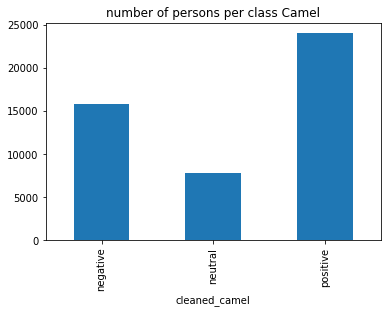

In [ ]:
all_data.groupby('cleaned_camel').size().plot(kind='bar', title='number of persons per class Camel')

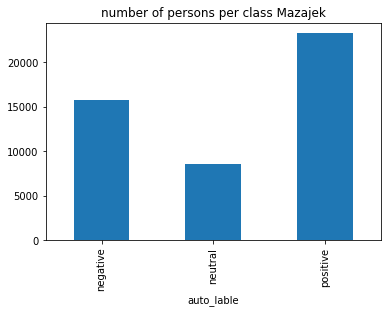

In [ ]:
df.groupby('auto_lable').size().plot(kind='bar', title='number of persons per class Mazajek')

In [ ]:
diff_df = all_data[all_data['auto_lable'] != all_data['cleaned_camel']]

In [ ]:
diff_df = diff_df[['norm_text','auto_lable','cleaned_camel']]

In [ ]:
diff_df

,norm_text,auto_lable,cleaned_camel
0,الحج المبرور ليس له جزاء الا الجنه السيره كانك...,positive,neutral
4,الاتحاد الاوروبى السعوديه نجحت باداره موسم الح...,neutral,positive
9,طريق مكه السعوديه تنهض داخليا وفق منهجيات الري...,neutral,positive
25,وزير الداخليه لـ خادم الحرمين دعمكم المباشر وت...,neutral,positive
28,رئيس الدوله محمد بن راشد يهنئان خادم الحرمين ا...,neutral,positive
...,...,...,...
47616,ليه الحجاج لما بيرجعوا من الحج ميبجوش لينا ماي...,negative,neutral
47620,مسابقه رحله الحج الاجابه يوم النحر والله ولى ا...,neutral,positive
47621,وقفه عرفات هذا العام باذن الله الجمعه سوره ...,positive,neutral
47634,اللى نقراه منك ابعد مايكون عن المراجل اطفال فى...,negative,positive


In [ ]:
diff_df.sample(15)

,norm_text,auto_lable,cleaned_camel
26772,يا من تمنى الحج فحبسه عذر ابشر بقوله ان بالم ...,negative,neutral
26344,ساكون معكم على قناه الساحات الفضائيه فى قضيه ا...,negative,neutral
35203,لا اله الا الله ولا نعبد الا اى اه ين له الدين...,positive,neutral
28454,كانت تلك هى اول عمليه لتحويل الحج الى حج اسلام...,negative,positive
36770,يوم رفه يوم بارك لا كتم الحج بدون يوم يام كف س...,neutral,positive
11135,نجاح موسم الحج فى قلب مكه جميع الخدمات متوفره ...,neutral,positive
1112,حساب وزاره الحج والعمره نقله نوعيه سواء فى الم...,neutral,positive
23485,الحج هو رمز لوحده المسلمين واعلان البراءه من ا...,negative,positive
25120,حتى الحج على حساب غيرك يخرب بيتك,neutral,negative
33625,وزاره الصحه اكثر الحالات زياره فى موسم الحج هى...,neutral,negative
